XGBOOST

In [34]:
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# import os

In [3]:
#os.chdir("C:\\Users\\Hp\\OneDrive\\Documents\\GitHub\\VSC-AI_ML\\DataSets")

In [4]:
data=load_iris()
X=pd.DataFrame(data.data, columns=data.feature_names)
y=pd.DataFrame(data.target)

In [5]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


<Axes: >

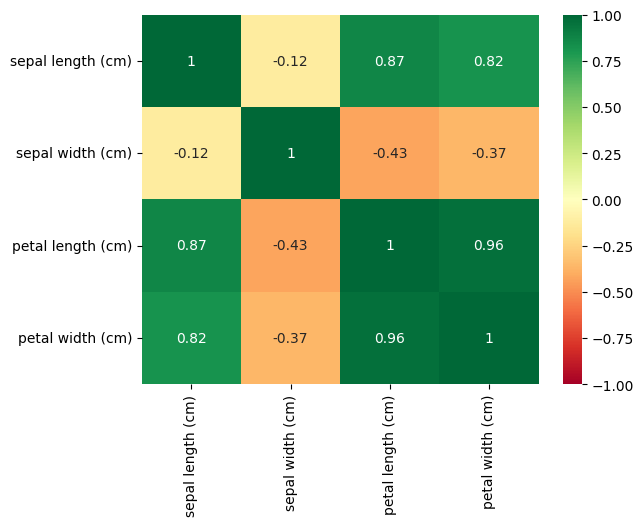

In [7]:
corr=X.corr()
sns.heatmap(corr, cmap='RdYlGn', annot=True, vmin=-1, vmax=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5 )

The main parameters in XGBOOST are:


Eta - How aggresively/slowly do we want to update our previous node values in the internally generated tree.
[DEFAULT = 0.3]

As we give it a smaller value, the change is smaller per step which ultimately results in slower steps towards the final value. This increases accuracy to a certain extent.

Gamma - It controls overfitting. The internal trees generated will not grow beyond out set limit which prevents overfitting.

Lesser values will result in smaller internal trees.

XGBOOST shows high efficiency with much larger data. Here we have only 768 records, if we compare it with the execution time of other models at this level, XGboost will probably take more time BUT this time decreases significantly with larger datasets.

In [9]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [10]:
model=XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9

HyperParameter Tuning using GridSearchCV

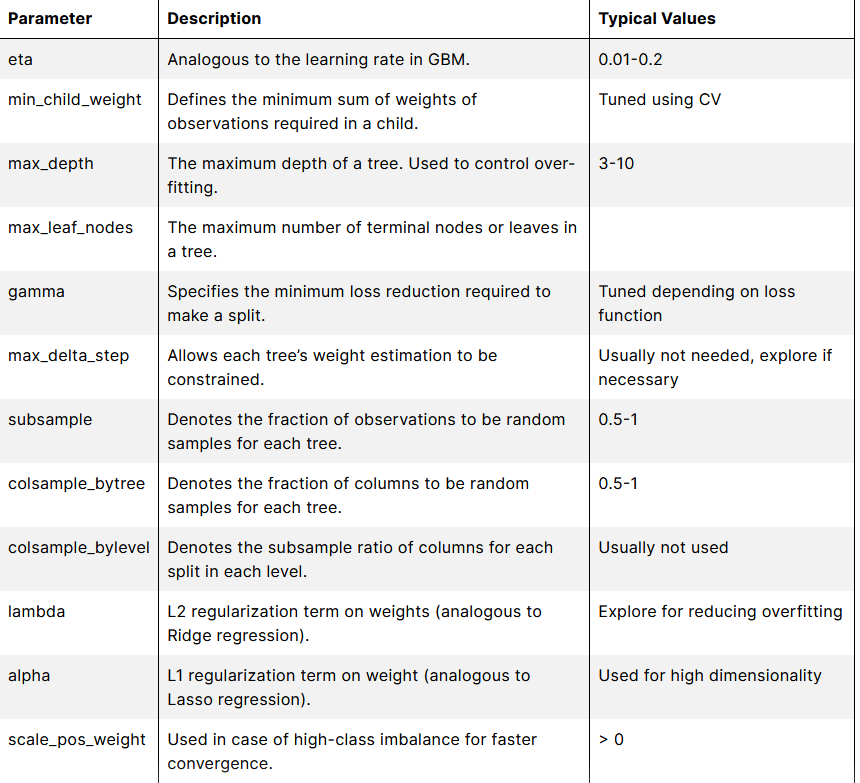

In [58]:
param_grid={
    'max_depth': [2,3,5,7],
    'eta': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.6, 0.8, 1],
    'gamma': [1, 5, 10, 50]
}

In [59]:
xgb= XGBClassifier()
param_model=GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')

In [60]:
param_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.1, 0.01, 0.001], 'gamma': [1, 5, 10, 50],
                         'max_depth': [2, 3, 5, 7],
                         'subsample': [0.5, 0.6, 0.8, 1]},
             scoring='accuracy')

In [61]:
param_model.best_params_

{'eta': 0.1, 'gamma': 1, 'max_depth': 2, 'subsample': 0.5}

In [62]:
param_model.best_score_

0.9583333333333334